In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import glob
import math
from imutils.object_detection import non_max_suppression



(182, 199, 3)


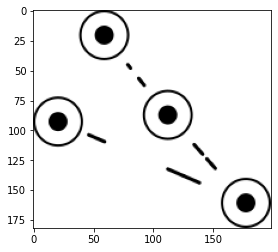

In [69]:
img = cv2.imread("punchline2.png")
plt.imshow(img)
print(img.shape)


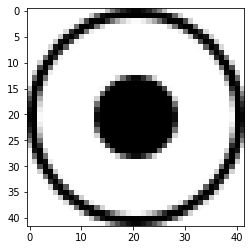

In [70]:
template = cv2.imread("template.png")
plt.imshow(template)
(tH, tW) = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[INFO] 11 matched locations *before* NMS
No of template matched locations 11


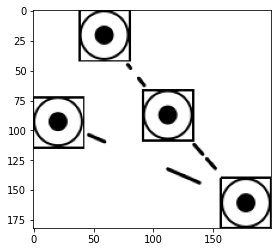

In [71]:

result = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.8)
number_of_templates_matched = 0
clone = img.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))
for (x, y) in zip(xCoords, yCoords):
    	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(0), 1)
	number_of_templates_matched = number_of_templates_matched + 1

print("No of template matched locations",number_of_templates_matched)
plt.imshow(clone,cmap="gray")


[INFO] 4 matched locations *after* NMS
[(178, 161), (21, 94), (113, 88), (60, 21)] shape of image (182, 199)


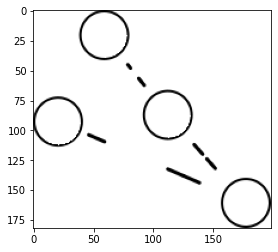

In [72]:
rects = []
clone2 = img.copy()
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
centers = [ ]
temp = ()
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	# cv2.rectangle(clone2, (startX, startY), (endX, endY),
		# (0), 1)
	temp = (int((startX+endX)/2), int((startY+endY)/2))
	image = cv2.circle(clone2, temp, int(0.9*((endX-startX)/2)), (255), -1)
	centers.append(temp)

# show the output image
plt.imshow(clone2,cmap="gray")
print(centers,"shape of image",img.shape)

In [88]:
print(math.sqrt(64))

8.0


In [95]:

center1 = centers[0]#i
center2 = centers[1]#j
x1 = center2[0]
y1 = center2[1]
x2 = center1[0]
y2 = center1[1]
print(center1,center2)
print(y2-y1)
pixels_in_line = []
rate = (y2-y1)/math.sqrt((x2-x1)**2+(y2-y1)**2)
print(rate)
if(x2>x1):

    for y in np.arange(y1,y2,rate):

        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
        print(y,x)
        pixels_in_line.append(clone2[int(y)][int(x)])
        
else:

    for x in np.arange(x2,x1,rate):
        x = (y-y1)*(x2-x1)/(y2-y1) + x1 
    
        pixels_in_line.append(clone2[int(y)][int(x)])

(178, 161) (21, 94)
67
0.3925047647998114
94.0 21.0
94.39250476479981 21.919749971247317
94.78500952959962 22.83949994249463
95.17751429439943 23.759249913741947
95.57001905919924 24.678999884989263
95.96252382399905 25.59874985623658
96.35502858879886 26.518499827483893
96.74753335359867 27.43824979873121
97.14003811839848 28.357999769978527
97.53254288319829 29.27774974122584
97.9250476479981 30.197499712473157
98.31755241279791 31.117249683720473
98.71005717759772 32.03699965496779
99.10256194239753 32.95674962621511
99.49506670719734 33.87649959746242
99.88757147199715 34.79624956870973
100.28007623679696 35.71599953995705
100.67258100159677 36.63574951120437
101.06508576639658 37.55549948245168
101.45759053119639 38.47524945369899
101.8500952959962 39.39499942494631
102.24260006079601 40.31474939619363
102.63510482559582 41.23449936744095
103.02760959039563 42.15424933868826
103.42011435519544 43.07399930993557
103.81261911999525 43.99374928118289
104.20512388479506 44.91349925243

In [96]:
print(pixels_in_line)
threshold = 200
imp_data = []
flag = False
flag2 = True
for pixel in pixels_in_line:
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data.append(pixel)
flag = False
flag2 = True
imp_data1 = []
for pixel in reversed(imp_data):
    if(pixel<threshold and flag2):
        flag = True
        flag2 = False

    if(flag):
        imp_data1.append(pixel)
imp_data1.reverse()
print("\n\n\n",imp_data1)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 9, 2, 255, 255, 255, 255, 255, 255, 44, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 12, 0, 2, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 227, 227, 0, 87, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]



 [9, 2, 255, 255, 255, 255, 255, 255, 44, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 12, 0, 2, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

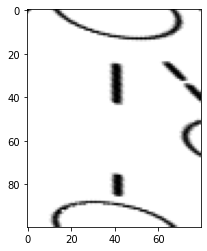

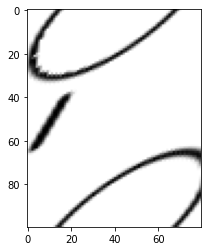

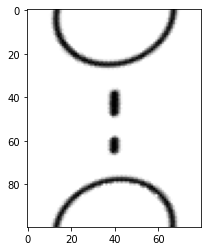

In [97]:
clone3 = img.copy()
perspective_frame = (80,100)
perspective_images = []
# (startX, startY, endX, endY)
for i in range(len(pick)-1):

    pts1 = np.float32([[pick[i][0],pick[i][3]],[pick[i][2],pick[i][1]],[pick[i+1][0],pick[i+1][3]],[pick[i+1][2],pick[i+1][1]]])
    pts2 = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(clone2,M,perspective_frame)
    perspective_images.append(dst)
    plt.figure()

    plt.imshow(dst,cmap="gray")
  

plt.show()


In [76]:
perspective_images[0].shape

(100, 80)